# Britsih Airways - Web Scraping Project 

Scraping Reviews from the web, cleaning data, and analyses of Data: I wrote the Python code in Google Colab, cleaned data in Excel, and made a ppt. Here is the code:

### 1. Scraping reviews from website:

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


### 2. Storing reviews in dataframe:

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df

,reviews
0,✅ Trip Verified | That was supposed to be my ...
1,✅ Trip Verified | Have no fear when your BA f...
2,Not Verified | We have flown BA five times fr...
3,✅ Trip Verified | London Heathrow to Istanbul...
4,"Not Verified | Jan 30th, I booked a last-minut..."
...,...
995,✅ Trip Verified | London Heathrow to Madrid. I...
996,✅ Trip Verified | Gatwick to St Lucia return....
997,✅ Trip Verified | It's been many years since ...
998,✅ Trip Verified | \r\nLondon Heathrow / Pisa r...


In [4]:
df.to_csv("pagedata.csv" )

In [5]:
pd.read_csv("pagedata.csv")

,Unnamed: 0,reviews
0,0,✅ Trip Verified | That was supposed to be my ...
1,1,✅ Trip Verified | Have no fear when your BA f...
2,2,Not Verified | We have flown BA five times fr...
3,3,✅ Trip Verified | London Heathrow to Istanbul...
4,4,"Not Verified | Jan 30th, I booked a last-minut..."
...,...,...
995,995,✅ Trip Verified | London Heathrow to Madrid. I...
996,996,✅ Trip Verified | Gatwick to St Lucia return....
997,997,✅ Trip Verified | It's been many years since ...
998,998,✅ Trip Verified | \r\nLondon Heathrow / Pisa r...


### LDA Topic Modeling on Review Data using Gensim

In [7]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess

# Read the CSV file
data = pd.read_csv('pagedata.csv')

# Preprocess the text data
processed_docs = data['reviews'].map(simple_preprocess)

# Create a dictionary from the preprocessed documents
dictionary = corpora.Dictionary(processed_docs)

# Create a document-term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_docs]

# Create the LDA model
lda_model = LdaModel(doc_term_matrix, id2word=dictionary, passes=10)

# Print the topics and their corresponding keywords
for topic in lda_model.print_topics():
    print(topic)


(83, '0.060*"the" + 0.035*"was" + 0.018*"to" + 0.013*"for" + 0.013*"you" + 0.013*"her" + 0.013*"flight" + 0.012*"rather" + 0.011*"me" + 0.011*"but"')
(58, '0.013*"not" + 0.011*"horrendous" + 0.011*"thing" + 0.011*"right" + 0.010*"arrive" + 0.010*"don" + 0.010*"worst" + 0.010*"got" + 0.009*"took" + 0.009*"take"')
(59, '0.011*"rockwell" + 0.011*"systems" + 0.011*"panasonic" + 0.011*"self" + 0.011*"barbados" + 0.011*"looks" + 0.011*"collins" + 0.011*"run" + 0.011*"added" + 0.011*"flown"')
(13, '0.001*"the" + 0.001*"to" + 0.001*"and" + 0.001*"was" + 0.001*"ba" + 0.001*"my" + 0.001*"for" + 0.001*"in" + 0.000*"not" + 0.000*"that"')
(85, '0.032*"to" + 0.030*"they" + 0.025*"flight" + 0.017*"baggage" + 0.014*"my" + 0.013*"the" + 0.013*"on" + 0.013*"no" + 0.013*"and" + 0.013*"of"')
(4, '0.043*"the" + 0.040*"and" + 0.037*"was" + 0.017*"to" + 0.017*"it" + 0.013*"in" + 0.011*"flight" + 0.009*"trip" + 0.009*"verified" + 0.009*"on"')
(53, '0.047*"and" + 0.036*"my" + 0.031*"to" + 0.029*"the" + 0.017*"

### Sentiment Analysis of reviews

In [9]:
# Importing the necessary libraries
import nltk
nltk.download('all')
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.collections import Counter
# Create an instance of the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Read the reviews from the CSV file
data = pd.read_csv('pagedata.csv')

# Extract the reviews from the 'review' column
reviews = data['reviews'].tolist()

# Filter the reviews based on sentiment
positive_reviews = []
negative_reviews = []
neutral_reviews = []

for review in reviews:
    sentiment = sia.polarity_scores(review)
    if sentiment['compound'] >= 0.2:
        positive_reviews.append(review)
    elif sentiment['compound'] <= -0.2:
        negative_reviews.append(review)
    else:
        neutral_reviews.append(review)


positive_reviews_count = Counter(positive_reviews)
negative_reviews_count = Counter(negative_reviews)
neutral_reviews_count = Counter(neutral_reviews)



print(f"\n\nTotal Positive Reviews: {sum(positive_reviews_count.values())}\n")
print(f"Total Negative Reviews: {sum(negative_reviews_count.values())}\n")
print(f"Total Neutral Reviews: {sum(neutral_reviews_count.values())}\n")



[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]    |   Package basqu



Total Positive Reviews: 471

Total Negative Reviews: 469

Total Neutral Reviews: 60



In [10]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB 1.3 MB/s eta 0:00:01
   ----- --------------------------------- 41.0/300.2 kB 487.6 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 744.7 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/300.2 kB 847.9 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/300.2 kB 807.1 kB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 976.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


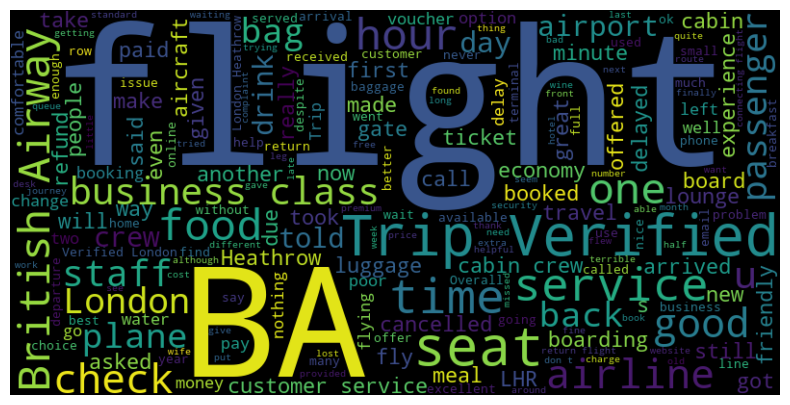

Total Reviews: 1000


In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
all_reviews = ' '.join(reviews)
wordcloud = WordCloud(width=800, height=400).generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Print the total number of reviews
total_reviews = len(reviews)
print(f"Total Reviews: {total_reviews}")

# END